<a href="https://colab.research.google.com/github/AlphaKermit-999/AI-Topics-learnings/blob/main/Advanced_AI/NLP_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [464]:
data = """Machine learning (ML) is a field of study in 12-09-1998 artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions.[1] Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.[2]

ML finds application in many fields, (123) 456-7890 including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. The application of ML to business problems is known as predictive analytics."""

In [465]:
data

'Machine learning (ML) is a field of study in 12-09-1998 artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions.[1] Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.[2]\n\nML finds application in many fields, (123) 456-7890 including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. The application of ML to business problems is known as predictive analytics.'

In [466]:
import re
re.sub(r'\D', " ", data)
re.sub('[-.()\D]', " ", data)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-1795630811.py:3: SyntaxWarning: invalid escape sequence '\D'
  re.sub('[-.()\D]', " ", data)


'                                             12 09 1998                                                                                                                                                                                                          1                                                                                                                                                                                                                           2                                         123  456 7890                                                                                                                                                                                                     '

In [467]:
re.findall("\d{2}-\d{2}-\d{4}", data)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1409829394.py:1: SyntaxWarning: invalid escape sequence '\d'
  re.findall("\d{2}-\d{2}-\d{4}", data)


['12-09-1998']

In [468]:
d1 = "i saw the yellow dog!"
expression = r"NP:{<DT>?<JJ>*<NN>+}"

In [469]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [470]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [471]:
word_tokenize(d1)

['i', 'saw', 'the', 'yellow', 'dog', '!']

In [472]:
d8 = sent_tokenize(d1)

In [473]:
sent_tokenize(data)

['Machine learning (ML) is a field of study in 12-09-1998 artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions.',
 '[1] Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.',
 '[2]\n\nML finds application in many fields, (123) 456-7890 including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.',
 'The application of ML to business problems is known as predictive analytics.']

In [474]:
len(sent_tokenize(data))

4

In [475]:
data = data.replace("\n", "")

In [476]:
data

'Machine learning (ML) is a field of study in 12-09-1998 artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions.[1] Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.[2]ML finds application in many fields, (123) 456-7890 including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. The application of ML to business problems is known as predictive analytics.'

In [477]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [478]:
d1 = "i saw the yellow dog!"
expression = r"NP:{<DT>?<JJ>*<NN>+}"
w1 = word_tokenize(d1)
chunk = nltk.RegexpParser(expression)
c1 = chunk.parse(pos_tag(w1))
# c1.draw()

In [479]:
pos_tag(w1)

[('i', 'NN'),
 ('saw', 'VBD'),
 ('the', 'DT'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('!', '.')]

In [480]:
print(c1)

(S (NP i/NN) saw/VBD (NP the/DT yellow/JJ dog/NN) !/.)


In [481]:
from nltk.util import ngrams, bigrams, trigrams
list(ngrams(w1, 3))

[('i', 'saw', 'the'),
 ('saw', 'the', 'yellow'),
 ('the', 'yellow', 'dog'),
 ('yellow', 'dog', '!')]

In [482]:
list(bigrams(w1))

[('i', 'saw'),
 ('saw', 'the'),
 ('the', 'yellow'),
 ('yellow', 'dog'),
 ('dog', '!')]

In [483]:
incorrect_words = ["azaming", "happpiiiiii", "thankkkkk", "thx"]

In [484]:
from nltk.metrics.distance import jaccard_distance
from nltk.corpus import words
nltk.download('words')


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [485]:
len(words.words())

236736

In [486]:
correct_words = words.words()

In [487]:
for i in incorrect_words:
    result = [(jaccard_distance(set(ngrams(i, 2)), set(ngrams(w, 2))), w) for w in correct_words if w[0] == i[0]]
    print(sorted(result, key=lambda val: val[0])[0][1])

amazing
happier
thank
th


In [488]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
ps = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [489]:
ps.stem("computing")

'comput'

In [490]:
ps.stem("elegant")

'eleg'

In [491]:
lm = WordNetLemmatizer()
lm.lemmatize("went", pos="v")

'go'

In [492]:
lm.lemmatize("computing", pos="v")

'compute'

In [493]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [494]:
w4 = stopwords.words("english")
print(w4)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [495]:
d5 = "i did not like the movie"
[i for i in word_tokenize(d5) if i not in w4]

['like', 'movie']

In [496]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [497]:
df = df[["v1", "v2"]]

In [498]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [499]:
df["before_count"] = df["v2"].apply(lambda x: len(x.split()))

In [500]:
df.describe()

,before_count
count,5572.000000
mean,15.494436
std,11.329427
min,1.000000
25%,7.000000
50%,12.000000
75%,23.000000
max,171.000000


In [501]:
df[df["before_count"]==1].shape

(41, 3)

In [502]:
df[df["before_count"]==1]

,v1,v2,before_count
260,ham,Yup,1
275,ham,Thanx...,1
283,ham,Okie...,1
286,ham,Ok..,1
782,ham,Beerage?,1
1272,ham,Ok...,1
1318,ham,Ok...,1
1426,ham,Ok...,1
1482,ham,Ok...,1
1611,ham,645,1


In [503]:
df["v1"].value_counts(normalize=True)

,proportion
v1,
ham,0.865937
spam,0.134063


In [504]:
# from imblearn.over_sampling import SMOTE
# x = df["v2"]
# y = df["v1"]

# sm = SMOTE()
# sm.fit_resample(x, y)

In [505]:
import pandas as pd
dd = pd.read_csv("Churn.csv")

In [506]:
dd.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [507]:
dd_n = dd.select_dtypes(include="number")
dd_n.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [508]:
from imblearn.over_sampling import SMOTE
x = dd_n.drop("Exited", axis=1)
y=dd["Exited"]

sm = SMOTE()
x_over, y_over = sm.fit_resample(x, y)

In [509]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [510]:
y_over.value_counts()

,count
Exited,
1,7963
0,7963


In [511]:
# df["v2"] = df["v2"].apply(lambda x: x.lower())

In [512]:
import string
# string.punctuation
w4.extend(string.punctuation)
print(w4)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [513]:
d6 = "lets ... eat, ... grandpa"
[i for i in word_tokenize(d6) if len(i)>1]

['lets', '...', 'eat', '...', 'grandpa']

In [514]:
# let's eat grandpa
def cleaning(example):
  d61 = re.sub("[^a-z]", " ", example)
  res = re.sub("\s+", " ", d61)
  res = res.strip()
  res1 = " ".join([i for i in word_tokenize(res) if len(i)>2])

  return res1


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2667093949.py:4: SyntaxWarning: invalid escape sequence '\s'
  res = re.sub("\s+", " ", d61)


In [515]:
all_text = " ".join(df["v2"])

In [516]:
from collections import Counter
word_counts = Counter(all_text.split())

In [517]:
df["v2"] = df["v2"].apply(lambda x: " ".join([i for i in word_tokenize(x) if i not in w4]))

In [518]:
df["v2"] = df["v2"].apply(cleaning)

In [519]:
d7 = pd.DataFrame(word_counts.items(), columns=["word", "count"]).sort_values(by="count", ascending=False)

In [520]:
len(d7[d7["count"]==1]["word"].values)

9268

In [521]:
df["after"] = df["v2"].apply(lambda x: len(x.split()))

In [522]:
df.describe()

,before_count,after
count,5572.000000,5572.000000
mean,15.494436,7.316403
std,11.329427,5.539130
min,1.000000,0.000000
25%,7.000000,3.000000
50%,12.000000,6.000000
75%,23.000000,10.000000
max,171.000000,85.000000


In [523]:
df[df["after"]!=0]

,v1,v2,before_count,after
0,ham,jurong point crazy vailable bugis great world ...,20,12
1,ham,lar oking wif oni,6,4
2,spam,ree entry wkly comp win final tkts ext receive...,28,16
3,ham,dun say early hor already say,11,6
4,ham,think goes usf lives around though,13,6
...,...,...,...,...
5567,spam,his time tried contact ound prize claim easy c...,30,14
5568,ham,ill going esplanade home,8,4
5569,ham,ity mood suggestions,10,3
5570,ham,guy bitching acted like interested buying some...,26,12


In [524]:
from wordcloud import WordCloud

In [525]:
wc = WordCloud().generate(all_text)

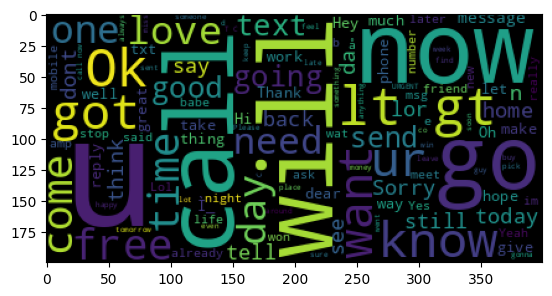

In [526]:
import matplotlib.pyplot as plt
plt.imshow(wc)

In [527]:
spam = " ".join(df[df["v1"]=="spam"]["v2"])
ham = " ".join(df[df["v1"]=="ham"]["v2"])

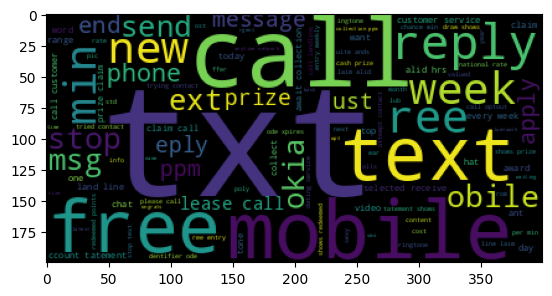

In [528]:
wc1 = WordCloud().generate(spam)
plt.imshow(wc1)

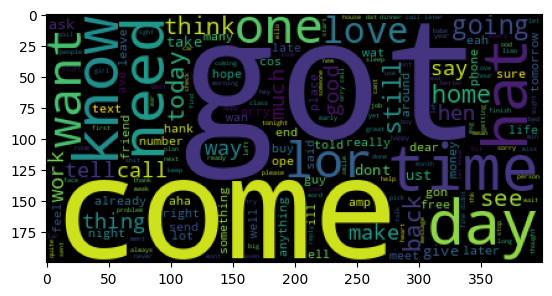

In [529]:
wc2 = WordCloud().generate(ham)
plt.imshow(wc2)

In [530]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [531]:
# !pip install english-words==1.0.2

In [532]:
cv = CountVectorizer(ngram_range=(1,3), stop_words="english", max_features=50)
x = cv.fit_transform(d8)
pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

,dog,saw,saw yellow,saw yellow dog,yellow,yellow dog
0,1,1,1,1,1,1


In [533]:
cv.vocabulary_

{'saw': np.int64(1),
 'yellow': np.int64(4),
 'dog': np.int64(0),
 'saw yellow': np.int64(2),
 'yellow dog': np.int64(5),
 'saw yellow dog': np.int64(3)}

In [534]:
d8

['i saw the yellow dog!']

In [535]:
len(cv.get_feature_names_out())

6

In [536]:
tf = TfidfVectorizer()
x2 = tf.fit_transform(df["v2"])
input1 = pd.DataFrame(x2.toarray(), columns=tf.get_feature_names_out())

In [537]:
from sklearn.ensemble import RandomForestClassifier

In [538]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(input1, df["v1"], test_size=0.2, random_state=45)

In [539]:
model = RandomForestClassifier(min_samples_split=5)
model.fit(xtrain, ytrain)

RandomForestClassifier(min_samples_split=5)

In [540]:
ypred_train = model.predict(xtrain)

In [541]:
ypred = model.predict(xtest)

In [542]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(ytest, ypred)

0.9668161434977578

In [543]:
accuracy_score(ytrain, ypred_train)

0.9982050706753421

In [544]:
print(classification_report(ytrain, ypred_train))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3885
        spam       1.00      0.99      0.99       572

    accuracy                           1.00      4457
   macro avg       1.00      0.99      1.00      4457
weighted avg       1.00      1.00      1.00      4457



In [545]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       940
        spam       1.00      0.79      0.88       175

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [546]:
parameter = {"n_estimators":[100,50,10,20],
 "criterion":['gini', 'entropy'],
 "max_depth":[8,10, None],
 "min_samples_split":[2, 5,7],
 "min_samples_leaf":[1, 2, 5]}

In [547]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=parameter, cv=2, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 2 folds for each of 216 candidates, totalling 432 fits
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.2s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   1.5s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.6s
[CV] END criter

GridSearchCV(cv=2, estimator=RandomForestClassifier(min_samples_split=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 50, 10, 20]},
             verbose=2)

In [548]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 50}